In [ ]:
!git clone https://github.com/jakeret/unet.git


Cloning into 'unet'...
remote: Enumerating objects: 479, done.
remote: Counting objects: 100% (25/25), done.
remote: Compressing objects: 100% (25/25), done.
remote: Total 479 (delta 15), reused 0 (delta 0), pack-reused 454
Receiving objects: 100% (479/479), 6.65 MiB | 20.81 MiB/s, done.
Resolving deltas: 100% (248/248), done.


In [ ]:
# Убедитесь, что pipenv установлен
!pip install pipenv

# Переход в каталог unet и выполнение pipenv install --dev
import os
os.chdir('unet')  # Изменение текущего рабочего каталога на unet
!pipenv install --dev


Neither 'pyenv' nor 'asdf' could be found to install Python.
You can specify specific versions of Python with:
$ pipenv --python path/to/python


In [ ]:
#Если драйв
import os
import shutil
from google.colab import drive

# Монтирование Google Drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
import zipfile
import os

# Путь к zip-файлу на Google Drive и каталогу для извлечения
zip_path = '/content/drive/MyDrive/berlin.zip'
extract_path = '/content/berlin'

# Распаковка ZIP-файла
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

# Проверка успешного извлечения
if os.path.exists(extract_path):
    print(f"Содержимое {zip_path} успешно распаковано в {extract_path}.")
else:
    print(f"Ошибка при распаковке файла.")


Содержимое /content/drive/MyDrive/berlin.zip успешно распаковано в /content/berlin.


In [ ]:
import os

def count_files_in_directory(directory):
    total_files = 0
    for root, dirs, files in os.walk(directory):
        total_files += len(files)
    return total_files

# Путь к папке
dataset_path = '/content/berlin'

# Подсчет всех файлов во всех вложенных папках
total_files = count_files_in_directory(dataset_path)

# Вывод количества файлов
print(f"Всего файлов в папке {dataset_path} и её вложенных папках: {total_files}")

# Подсчет всех файлов во всех вложенных папках
total_files = count_files_in_directory(dataset_path)

# Вывод количества файлов
print(f"Всего файлов в папке {dataset_path} и её вложенных папках: {total_files}")


Всего файлов в папке /content/berlin и её вложенных папках: 400
Всего файлов в папке /content/berlin и её вложенных папках: 400


In [ ]:
# если файлы не рассортированы по папкам, если уже рассортированы, ячейку не запускать!
import os
import shutil
import re

# Путь к папке с данными на вашем ПК
DATA_DIR = '/content/berlin/berlin'

# Получаем список всех файлов и их размеры
files = os.listdir(DATA_DIR)
files_info = [(file, os.path.getsize(os.path.join(DATA_DIR, file))) for file in files]

# Отделяем файлы изображений и масок
images = [f for f, _ in files_info if f.endswith('image.png')]
labels = [f for f, _ in files_info if f.endswith('labels.png')]

# Убедимся, что списки сортированы по числам в именах файлов
images.sort(key=lambda x: int(re.search(r'(\d+)', x).group()))
labels.sort(key=lambda x: int(re.search(r'(\d+)', x).group()))

# Функция для распределения файлов по папкам
def distribute_files(images, labels, base_dir):
    # Создаем папки для изображений и масок
    os.makedirs(os.path.join(base_dir, 'train', 'images'), exist_ok=True)
    os.makedirs(os.path.join(base_dir, 'train', 'labels'), exist_ok=True)
    os.makedirs(os.path.join(base_dir, 'val', 'images'), exist_ok=True)
    os.makedirs(os.path.join(base_dir, 'val', 'labels'), exist_ok=True)
    os.makedirs(os.path.join(base_dir, 'test', 'images'), exist_ok=True)
    os.makedirs(os.path.join(base_dir, 'test', 'labels'), exist_ok=True)

    # Разделение файлов по наборам
    num_images = len(images)
    train_end = int(num_images * 0.7)
    val_end = int(num_images * 0.9)

    # Распределение изображений
    for i, image in enumerate(images):
        if i < train_end:
            subdir = 'train'
        elif i < val_end:
            subdir = 'val'
        else:
            subdir = 'test'
        shutil.move(os.path.join(DATA_DIR, image), os.path.join(base_dir, subdir, 'images', image))

    # Распределение масок
    for i, label in enumerate(labels):
        if i < train_end:
            subdir = 'train'
        elif i < val_end:
            subdir = 'val'
        else:
            subdir = 'test'
        shutil.move(os.path.join(DATA_DIR, label), os.path.join(base_dir, subdir, 'labels', label))

# Распределяем файлы
distribute_files(images, labels, DATA_DIR)

# Вывод информации о результатах
print(f"Файлы в папке 'train/images': {len(os.listdir(os.path.join(DATA_DIR, 'train', 'images')))}")
print(f"Файлы в папке 'train/labels': {len(os.listdir(os.path.join(DATA_DIR, 'train', 'labels')))}")
print(f"Файлы в папке 'val/images': {len(os.listdir(os.path.join(DATA_DIR, 'val', 'images')))}")
print(f"Файлы в папке 'val/labels': {len(os.listdir(os.path.join(DATA_DIR, 'val', 'labels')))}")
print(f"Файлы в папке 'test/images': {len(os.listdir(os.path.join(DATA_DIR, 'test', 'images')))}")
print(f"Файлы в папке 'test/labels': {len(os.listdir(os.path.join(DATA_DIR, 'test', 'labels')))}")


Файлы в папке 'train/images': 140
Файлы в папке 'train/labels': 140
Файлы в папке 'val/images': 40
Файлы в папке 'val/labels': 40
Файлы в папке 'test/images': 20
Файлы в папке 'test/labels': 20


In [ ]:
import os, cv2
import numpy as np
import pandas as pd
import random, tqdm
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

import torch
import torch.nn as nn
from torch.utils.data import DataLoader
import albumentations as album

In [ ]:
!pip install -q -U segmentation-models-pytorch albumentations > /dev/null
import segmentation_models_pytorch as smp

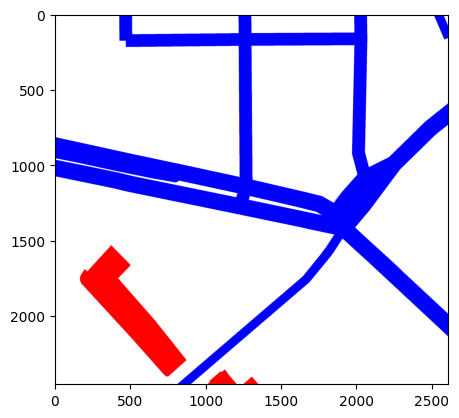

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import load_img, img_to_array

# Загрузите изображение маски
mask_file = '/content/berlin/berlin/test/labels/berlin181_labels.png'  # Замените на путь к файлу маски
mask = img_to_array(load_img(mask_file))  # Загрузите маску и преобразуйте в массив NumPy

# Определите карту классов как словарь
class_map = {
    (255, 0, 0): 0,  # Здания
    (0, 0, 255): 1,  # Дороги
    (255, 255, 255): 2  # Фон
}

# Функция для преобразования RGB маски в индексы классов
def rgb_to_class_index(mask, class_map):
    mask_index = np.zeros(mask.shape[:2], dtype=np.int32)
    for rgb_color, class_index in class_map.items():
        matches = (mask == rgb_color).all(axis=-1)
        mask_index[matches] = class_index
    return mask_index

# Преобразуйте маску из RGB в индексы классов
mask_index = rgb_to_class_index(mask, class_map)

# Функция для визуализации маски
def visualize_mask(mask_index, class_colors):
    mask_rgb = np.zeros((*mask_index.shape, 3), dtype=np.uint8)
    for class_idx, color in enumerate(class_colors):
        mask_rgb[mask_index == class_idx] = color
    plt.imshow(mask_rgb)
    plt.show()

# Определите список цветов для каждого класса
class_colors = [
    [255, 0, 0],     # Здания
    [0, 0, 255],     # Дороги
    [255, 255, 255], # Фон
]

# Визуализируйте маску
visualize_mask(mask_index, class_colors)



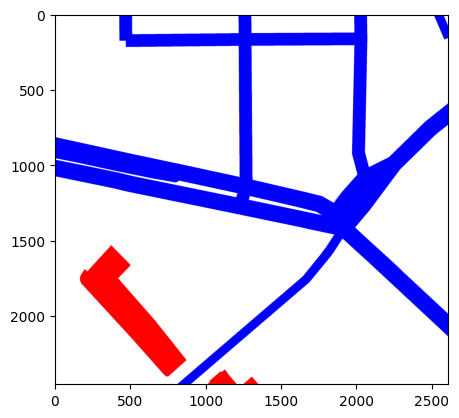

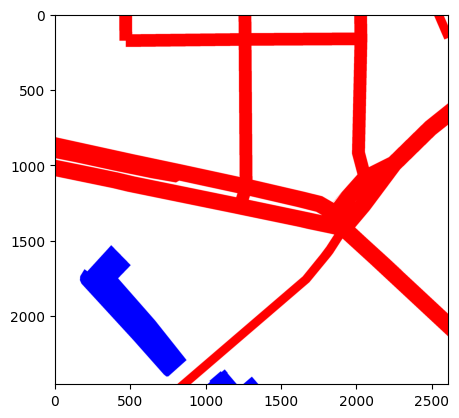

In [ ]:
import cv2
from matplotlib import pyplot as plt

# проверка какой формат отображения маски Загрузка изображения с помощью OpenCV
image_bgr = cv2.imread('/content/berlin/berlin/test/labels/berlin181_labels.png')
image_rgb = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2RGB)

# Визуализация с помощью Matplotlib
plt.imshow(image_rgb)  # Правильные цвета
plt.show()

plt.imshow(image_bgr)  # Неправильные цвета, если Matplotlib ожидает RGB
plt.show()


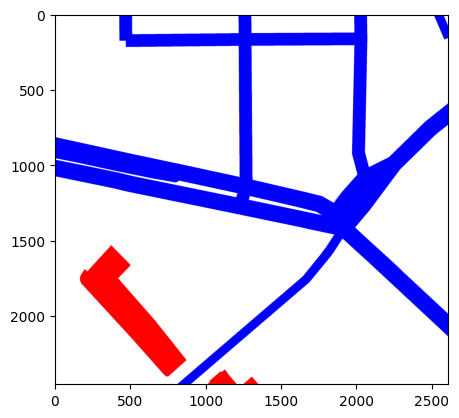

In [ ]:
# Предполагая, что 'image_bgr' было загружено с помощью OpenCV
image_rgb = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2RGB)

# Теперь 'image_rgb' в правильном порядке RGB для Matplotlib
plt.imshow(image_rgb)
plt.show()


In [ ]:
import numpy as np
image_rgb = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2RGB)
def rgb_to_class_index(mask):
    class_map = {
        (255, 0, 0): 0,  # Здания
        (0, 0, 255): 1,  # Дороги
        (255, 255, 255): 2  # Фон
    }
    mask_index = np.zeros(mask.shape[:2], dtype=np.int32)

    # Используем NumPy для более быстрого сравнения
    for rgb_color, class_index in class_map.items():
        matches = np.all(mask == np.array(rgb_color, dtype=np.uint8), axis=-1)
        mask_index[matches] = class_index

    return mask_index

In [ ]:
import os
import cv2
import numpy as np
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms
from PIL import Image
import albumentations as A

# Функция для преобразования цветной маски в индексную
def rgb_to_class_index(mask):
    class_map = {
        (255, 0, 0): 0,  # Здания
        (0, 0, 255): 1,  # Дороги
        (255, 255, 255): 2  # Фон
    }
    mask_index = np.zeros(mask.shape[:2], dtype=np.int32)
    for rgb_color, class_index in class_map.items():
        matches = np.all(mask == np.array(rgb_color, dtype=np.uint8), axis=-1)
        mask_index[matches] = class_index
    return mask_index

# Класс датасета для сегментации
class SegmentationDataset(Dataset):
    def __init__(self, image_paths, mask_paths, transform=None):
        self.image_paths = image_paths
        self.mask_paths = mask_paths
        self.transform = transform

    def __len__(self):
        return len(self.image_paths)

    def __getitem__(self, index):
        image = cv2.imread(self.image_paths[index])
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Преобразование из BGR в RGB
        mask = cv2.imread(self.mask_paths[index], cv2.IMREAD_UNCHANGED)  # Загрузка маски

        mask = rgb_to_class_index(mask)  # Преобразование маски из RGB в индексный вид

        if self.transform:
            augmented = self.transform(image=image, mask=mask)
            image = augmented['image']
            mask = augmented['mask']

        image = transforms.ToTensor()(image)
        mask = torch.from_numpy(mask).long()  # Преобразование маски в torch.Tensor

        return image, mask



In [ ]:
# Функция для получения DataLoader'ов
def get_data_loaders(image_dir, mask_dir, batch_size):
    image_paths = [os.path.join(image_dir, img_name) for img_name in sorted(os.listdir(image_dir))]
    mask_paths = [os.path.join(mask_dir, mask_name) for mask_name in sorted(os.listdir(mask_dir))]

    # Определение трансформаций
    train_transform = A.Compose([
        A.HorizontalFlip(p=0.5),
        A.RandomBrightnessContrast(p=0.2),
        # Добавьте дополнительные трансформации, если нужно
    ])

    # Создание экземпляров Dataset
    train_dataset = SegmentationDataset(image_paths, mask_paths, transform=train_transform)
    train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

    return train_loader

# Используем функцию для получения DataLoader для обучающей и валидационной выборок
train_loader = get_data_loader(
    image_dir='/content/berlin/berlin/train/images',
    mask_dir='/content/berlin/berlin/train/labels',
    batch_size=8
)

val_loader = get_data_loader(
    image_dir='/content/berlin/berlin/val/images',
    mask_dir='/content/berlin/berlin/val/labels',
    batch_size=8
)


In [ ]:
from torchvision import transforms
from torch.utils.data import DataLoader
import os
from PIL import Image

class SegmentationDataset(Dataset):
    def __init__(self, image_paths, mask_paths, transform=None):
        self.image_paths = image_paths
        self.mask_paths = mask_paths
        self.transform = transform

    def __len__(self):
        return len(self.image_paths)

    def __getitem__(self, index):
        image = Image.open(self.image_paths[index]).convert("RGB")
        mask = Image.open(self.mask_paths[index]).convert("RGB") # если маска цветная
        if self.transform is not None:
            image = self.transform(image)
            mask = self.transform(mask)
        return image, mask

def get_data_loader(image_dir, mask_dir, batch_size):
    # Определение преобразования с ресайзингом и преобразованием в тензор
    transform = transforms.Compose([
        transforms.Resize((256, 256)),
        transforms.ToTensor(),
    ])

    import torchvision.transforms as transforms


    # Собираем пути к файлам изображений и масок
    image_paths = [os.path.join(image_dir, img_name) for img_name in sorted(os.listdir(image_dir))]
    mask_paths = [os.path.join(mask_dir, mask_name) for mask_name in sorted(os.listdir(mask_dir))]

    # Создаем экземпляр нашего класса датасета
    dataset = SegmentationDataset(image_paths=image_paths, mask_paths=mask_paths, transform=transform)

    # Создаем DataLoader
    data_loader = DataLoader(dataset, batch_size=batch_size, shuffle=True)

    return data_loader

# Получаем DataLoader'ы
train_loader = get_data_loader(
    image_dir='/content/berlin/berlin/train/images',
    mask_dir='/content/berlin/berlin/train/labels',
    batch_size=8
)

val_loader = get_data_loader(
    image_dir='/content/berlin/berlin/val/images',
    mask_dir='/content/berlin/berlin/val/labels',
    batch_size=8
)


images, masks = next(iter(train_loader))
print(masks.dtype)  # Должно быть torch.int64 или torch.long

torch.float32


In [ ]:
'''train_loader, val_loader = get_training_data(
    image_dir='/content/berlin/berlin/train/images',
    mask_dir='/content/berlin/berlin/train/labels',
    batch_size=8,
    val_size=0.1 # Это доля данных, которая будет использоваться для валидации
)''' # если у нас не было разделения нра папки трейн-вал ранее


In [ ]:
pip install -U segmentation-models-pytorch


In [ ]:
import segmentation_models_pytorch as smp

# Создание модели, оптимизатора и функции потерь
model = smp.Unet(encoder_name='resnet34', classes=3, activation='softmax')
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
criterion = torch.nn.CrossEntropyLoss()

# Перенос модели на устройство
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model.to(device)

# Обучающий цикл
for epoch in range(10):
    model.train()
    for images, true_masks in train_loader:
        images = images.to(device).long
        true_masks = true_masks.to(device)

        # Предсказание модели
        predictions = model(images)

        # Вычисление потерь
        loss = criterion(predictions, true_masks)

        # Оптимизация модели
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    # Валидация
    model.eval()
    with torch.no_grad():
        for images, true_masks in val_loader:
            images = images.to(device)
            true_masks = true_masks.to(device)
            predictions = model(images)

            # Вычисление статистики для метрик
            tp, fp, fn, tn = smp.metrics.get_stats(predictions, true_masks, mode='multiclass', threshold=0.5)

            # Вычисление метрик на основе статистики
            iou_score = smp.metrics.iou_score(tp, fp, fn, tn, reduction="micro")
            f1_score = smp.metrics.f1_score(tp, fp, fn, tn, reduction="micro")

import matplotlib.pyplot as plt

# Списки для сохранения истории потерь и метрик
train_loss_list = []
val_loss_list = []
train_iou_list = []
val_iou_list = []

# Обучающий цикл
for epoch in range(10):
    train_loss = 0
    val_loss = 0
    train_iou = 0
    val_iou = 0

    # Обучение
    model.train()
    for images, true_masks in train_loader:
        images = images.to(device)
        true_masks = true_masks.to(device)

        # Предсказание модели
        predictions = model(images)

        # Вычисление потерь
        loss_value = criterion(predictions, true_masks)
        train_loss += loss_value.item()

        # Оптимизация модели
        optimizer.zero_grad()
        loss_value.backward()
        optimizer.step()

    # Средняя потеря на обучении
    train_loss /= len(train_loader)


# Валидация
model.eval()
with torch.no_grad():
    for images, true_masks in val_loader:
        images = images.to(device)

        # Преобразование масок к целочисленному типу, если они еще не целочисленные
        true_masks = true_masks.to(device).long()

        predictions = model(images)

        # Вычисление статистики для метрик
        tp, fp, fn, tn = smp.metrics.get_stats(predictions, true_masks, mode='multiclass', threshold=0.5)

        # Вычисление метрик на основе статистики
        iou_score = smp.metrics.iou_score(tp, fp, fn, tn, reduction="micro")
        f1_score = smp.metrics.f1_score(tp, fp, fn, tn, reduction="micro")


    # Средняя потеря на валидации
    val_loss /= len(val_loader)
    val_iou /= len(val_loader)

    # Сохраняем историю
    train_loss_list.append(train_loss)
    val_loss_list.append(val_loss)
    train_iou_list.append(train_iou)
    val_iou_list.append(val_iou)

    print(f"Epoch {epoch+1}, Train Loss: {train_loss}, Validation Loss: {val_loss}, Validation IoU: {val_iou}")

# Визуализация истории потерь
plt.figure(figsize=(12, 5))  # Закрываем скобку и добавляем размер фигуры
plt.plot(train_loss_list, label='Train loss')
plt.plot(val_loss_list, label='Validation loss')
plt.legend()
plt.title('Loss over epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()



AttributeError: ignored

In [ ]:
from segmentation_models_pytorch import losses, metrics

# Определение функции потерь и метрик
loss = losses.DiceLoss(mode='multiclass')
iou_metric = metrics.IoU(threshold=0.5)


AttributeError: ignored

In [ ]:
import matplotlib.pyplot as plt

# Предположим, что у вас есть списки или словари с историей потерь и метрик
# Здесь мы инициализируем их пустыми списками для демонстрации
train_loss = []
val_loss = []
train_iou = []
val_iou = []

# Предположим, что ваши функции обучения возвращают потери и IoU
for epoch in range(num_epochs):
    # Обучение и валидация модели
    train_logs = train_epoch.run(train_loader)
    val_logs = val_epoch.run(val_loader)

    # Запись результатов
    train_loss.append(train_logs['dice_loss'])
    val_loss.append(val_logs['dice_loss'])
    train_iou.append(train_logs['iou_score'])
    val_iou.append(val_logs['iou_score'])

# Построение графика потерь
plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
plt.plot(train_loss, label='Обучение')
plt.plot(val_loss, label='Валидация')
plt.title('Потери')
plt.xlabel('Эпоха')
plt.ylabel('Потери')
plt.legend()

# Построение графика IoU
plt.subplot(1, 2, 2)
plt.plot(train_iou, label='Обучение')
plt.plot(val_iou, label='Валидация')
plt.title('IoU')
plt.xlabel('Эпоха')
plt.ylabel('IoU')
plt.legend()

plt.show()


In [ ]:
dataset = /content/berlin/berlin (x_train_dir, y_train_dir, class_rgb_values=select_class_rgb_values)
random_idx = random.randint(0, len(dataset)-1)
image, mask = dataset[2]

visualize(
    original_image = image,
    ground_truth_mask = colour_code_segmentation(reverse_one_hot(mask), select_class_rgb_values),
    one_hot_encoded_mask = reverse_one_hot(mask)
)

In [ ]:
# helper function for data visualization
def visualize(**images):
    """
    Plot images in one row
    """
    n_images = len(images)
    plt.figure(figsize=(20,8))
    for idx, (name, image) in enumerate(images.items()):
        plt.subplot(1, n_images, idx + 1)
        plt.xticks([]);
        plt.yticks([])
        # get title from the parameter names
        plt.title(name.replace('_',' ').title(), fontsize=20)
        plt.imshow(image)
    plt.show()

# Perform one hot encoding on label
def one_hot_encode(label, label_values):
    """
    Convert a segmentation image label array to one-hot format
    by replacing each pixel value with a vector of length num_classes
    # Arguments
        label: The 2D array segmentation image label
        label_values

    # Returns
        A 2D array with the same width and hieght as the input, but
        with a depth size of num_classes
    """
    semantic_map = []
    for colour in label_values:
        equality = np.equal(label, colour)
        class_map = np.all(equality, axis = -1)
        semantic_map.append(class_map)
    semantic_map = np.stack(semantic_map, axis=-1)

    return semantic_map

# Perform reverse one-hot-encoding on labels / preds
def reverse_one_hot(image):
    """
    Transform a 2D array in one-hot format (depth is num_classes),
    to a 2D array with only 1 channel, where each pixel value is
    the classified class key.
    # Arguments
        image: The one-hot format image

    # Returns
        A 2D array with the same width and hieght as the input, but
        with a depth size of 1, where each pixel value is the classified
        class key.
    """
    x = np.argmax(image, axis = -1)
    return x

# Perform colour coding on the reverse-one-hot outputs
def colour_code_segmentation(image, label_values):
    """
    Given a 1-channel array of class keys, colour code the segmentation results.
    # Arguments
        image: single channel array where each value represents the class key.
        label_values

    # Returns
        Colour coded image for segmentation visualization
    """
    colour_codes = np.array(label_values)
    x = colour_codes[image.astype(int)]

    return x

In [ ]:
class BuildingsDataset(torch.utils.data.Dataset):

    """Massachusetts Buildings Dataset. Read images, apply augmentation and preprocessing transformations.

    Args:
        images_dir (str): path to images folder
        masks_dir (str): path to segmentation masks folder
        class_rgb_values (list): RGB values of select classes to extract from segmentation mask
        augmentation (albumentations.Compose): data transfromation pipeline
            (e.g. flip, scale, etc.)
        preprocessing (albumentations.Compose): data preprocessing
            (e.g. noralization, shape manipulation, etc.)

    """

    def __init__(
            self,
            images_dir,
            masks_dir,
            class_rgb_values=None,
            augmentation=None,
            preprocessing=None,
    ):

        self.image_paths = [os.path.join(images_dir, image_id) for image_id in sorted(os.listdir(images_dir))]
        self.mask_paths = [os.path.join(masks_dir, image_id) for image_id in sorted(os.listdir(masks_dir))]

        self.class_rgb_values = class_rgb_values
        self.augmentation = augmentation
        self.preprocessing = preprocessing

    def __getitem__(self, i):

        # read images and masks
        image = cv2.cvtColor(cv2.imread(self.image_paths[i]), cv2.COLOR_BGR2RGB)
        mask = cv2.cvtColor(cv2.imread(self.mask_paths[i]), cv2.COLOR_BGR2RGB)

        # one-hot-encode the mask
        mask = one_hot_encode(mask, self.class_rgb_values).astype('float')

        # apply augmentations
        if self.augmentation:
            sample = self.augmentation(image=image, mask=mask)
            image, mask = sample['image'], sample['mask']

        # apply preprocessing
        if self.preprocessing:
            sample = self.preprocessing(image=image, mask=mask)
            image, mask = sample['image'], sample['mask']

        return image, mask

    def __len__(self):
        # return length of
        return len(self.image_paths)

In [ ]:
dataset = BuildingsDataset(x_train_dir, y_train_dir, class_rgb_values=select_class_rgb_values)
random_idx = random.randint(0, len(dataset)-1)
image, mask = dataset[2]

visualize(
    original_image = image,
    ground_truth_mask = colour_code_segmentation(reverse_one_hot(mask), select_class_rgb_values),
    one_hot_encoded_mask = reverse_one_hot(mask)
)

In [ ]:
def get_training_augmentation():
    train_transform = [
        album.RandomCrop(height=256, width=256, always_apply=True),
        album.OneOf(
            [
                album.HorizontalFlip(p=1),
                album.VerticalFlip(p=1),
                album.RandomRotate90(p=1),
            ],
            p=0.75,
        ),
    ]
    return album.Compose(train_transform)


def get_validation_augmentation():
    # Add sufficient padding to ensure image is divisible by 32
    test_transform = [
        album.PadIfNeeded(min_height=1536, min_width=1536, always_apply=True, border_mode=0),
    ]
    return album.Compose(test_transform)


def to_tensor(x, **kwargs):
    return x.transpose(2, 0, 1).astype('float32')


def get_preprocessing(preprocessing_fn=None):
    """Construct preprocessing transform
    Args:
        preprocessing_fn (callable): data normalization function
            (can be specific for each pretrained neural network)
    Return:
        transform: albumentations.Compose
    """
    _transform = []
    if preprocessing_fn:
        _transform.append(album.Lambda(image=preprocessing_fn))
    _transform.append(album.Lambda(image=to_tensor, mask=to_tensor))

    return album.Compose(_transform)

In [ ]:
augmented_dataset = BuildingsDataset(
    x_train_dir, y_train_dir,
    augmentation=get_training_augmentation(),
    class_rgb_values=select_class_rgb_values,
)

random_idx = random.randint(0, len(augmented_dataset)-1)

# Different augmentations on a random image/mask pair (256*256 crop)
for i in range(3):
    image, mask = augmented_dataset[random_idx]
    visualize(
        original_image = image,
        ground_truth_mask = colour_code_segmentation(reverse_one_hot(mask), select_class_rgb_values),
        one_hot_encoded_mask = reverse_one_hot(mask)
    )

In [ ]:
class DoubleConv(nn.Module):
    def __init__(self, in_channels, out_channels):
        super(DoubleConv, self).__init__()
        self.double_conv = nn.Sequential(
            nn.Conv2d(in_channels, out_channels, kernel_size=3, padding=1),
            nn.BatchNorm2d(out_channels),
            nn.ReLU(inplace=True),
            nn.Conv2d(out_channels, out_channels, kernel_size=3, padding=1),
            nn.BatchNorm2d(out_channels),
            nn.ReLU(inplace=True),
        )

    def forward(self, x):
        return self.double_conv(x)


class DownBlock(nn.Module):
    def __init__(self, in_channels, out_channels):
        super(DownBlock, self).__init__()
        self.double_conv = DoubleConv(in_channels, out_channels)
        self.down_sample = nn.MaxPool2d(2)

    def forward(self, x):
        skip_out = self.double_conv(x)
        down_out = self.down_sample(skip_out)
        return (down_out, skip_out)


class UpBlock(nn.Module):
    def __init__(self, in_channels, out_channels, up_sample_mode):
        super(UpBlock, self).__init__()
        if up_sample_mode == 'conv_transpose':
            self.up_sample = nn.ConvTranspose2d(in_channels-out_channels, in_channels-out_channels, kernel_size=2, stride=2)
        elif up_sample_mode == 'bilinear':
            self.up_sample = nn.Upsample(scale_factor=2, mode='bilinear', align_corners=True)
        else:
            raise ValueError("Unsupported `up_sample_mode` (can take one of `conv_transpose` or `bilinear`)")
        self.double_conv = DoubleConv(in_channels, out_channels)

    def forward(self, down_input, skip_input):
        x = self.up_sample(down_input)
        x = torch.cat([x, skip_input], dim=1)
        return self.double_conv(x)


class UNet(nn.Module):
    def __init__(self, out_classes=2, up_sample_mode='conv_transpose'):
        super(UNet, self).__init__()
        self.up_sample_mode = up_sample_mode
        # Downsampling Path
        self.down_conv1 = DownBlock(3, 64)
        self.down_conv2 = DownBlock(64, 128)
        self.down_conv3 = DownBlock(128, 256)
        self.down_conv4 = DownBlock(256, 512)
        # Bottleneck
        self.double_conv = DoubleConv(512, 1024)
        # Upsampling Path
        self.up_conv4 = UpBlock(512 + 1024, 512, self.up_sample_mode)
        self.up_conv3 = UpBlock(256 + 512, 256, self.up_sample_mode)
        self.up_conv2 = UpBlock(128 + 256, 128, self.up_sample_mode)
        self.up_conv1 = UpBlock(128 + 64, 64, self.up_sample_mode)
        # Final Convolution
        self.conv_last = nn.Conv2d(64, out_classes, kernel_size=1)

    def forward(self, x):
        x, skip1_out = self.down_conv1(x)
        x, skip2_out = self.down_conv2(x)
        x, skip3_out = self.down_conv3(x)
        x, skip4_out = self.down_conv4(x)
        x = self.double_conv(x)
        x = self.up_conv4(x, skip4_out)
        x = self.up_conv3(x, skip3_out)
        x = self.up_conv2(x, skip2_out)
        x = self.up_conv1(x, skip1_out)
        x = self.conv_last(x)
        return x


# Get UNet model
model = UNet()

In [ ]:
# Get train and val dataset instances
train_dataset = BuildingsDataset(
    x_train_dir, y_train_dir,
    augmentation=get_training_augmentation(),
    preprocessing=get_preprocessing(preprocessing_fn=None),
    class_rgb_values=select_class_rgb_values,
)

valid_dataset = BuildingsDataset(
    x_valid_dir, y_valid_dir,
    augmentation=get_validation_augmentation(),
    preprocessing=get_preprocessing(preprocessing_fn=None),
    class_rgb_values=select_class_rgb_values,
)

# Get train and val data loaders
train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True, num_workers=12)
valid_loader = DataLoader(valid_dataset, batch_size=1, shuffle=False, num_workers=4)

In [ ]:
# Set flag to train the model or not. If set to 'False', only prediction is performed (using an older model checkpoint)
TRAINING = True

# Set num of epochs
EPOCHS = 12

# Set device: `cuda` or `cpu`
DEVICE = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# define loss function
loss = smp.utils.losses.DiceLoss()

# define metrics
metrics = [
    smp.utils.metrics.IoU(threshold=0.5),
]

# define optimizer
optimizer = torch.optim.Adam([
    dict(params=model.parameters(), lr=0.00008),
])

# define learning rate scheduler (not used in this NB)
lr_scheduler = torch.optim.lr_scheduler.CosineAnnealingWarmRestarts(
    optimizer, T_0=1, T_mult=2, eta_min=5e-5,
)

# load best saved model checkpoint from previous commit (if present)
if os.path.exists('../input/unet-for-building-segmentation-pytorch/best_model.pth'):
    model = torch.load('../input/unet-for-building-segmentation-pytorch/best_model.pth', map_location=DEVICE)

In [ ]:
train_epoch = smp.utils.train.TrainEpoch(
    model,
    loss=loss,
    metrics=metrics,
    optimizer=optimizer,
    device=DEVICE,
    verbose=True,
)

valid_epoch = smp.utils.train.ValidEpoch(
    model,
    loss=loss,
    metrics=metrics,
    device=DEVICE,
    verbose=True,
)

In [ ]:
%%time

if TRAINING:

    best_iou_score = 0.0
    train_logs_list, valid_logs_list = [], []

    for i in range(0, EPOCHS):

        # Perform training & validation
        print('\nEpoch: {}'.format(i))
        train_logs = train_epoch.run(train_loader)
        valid_logs = valid_epoch.run(valid_loader)
        train_logs_list.append(train_logs)
        valid_logs_list.append(valid_logs)

        # Save model if a better val IoU score is obtained
        if best_iou_score < valid_logs['iou_score']:
            best_iou_score = valid_logs['iou_score']
            torch.save(model, './best_model.pth')
            print('Model saved!')

In [ ]:
# load best saved model checkpoint from the current run
if os.path.exists('./best_model.pth'):
    best_model = torch.load('./best_model.pth', map_location=DEVICE)
    print('Loaded UNet model from this run.')

# load best saved model checkpoint from previous commit (if present)
elif os.path.exists('../input/unet-for-building-segmentation-pytorch/best_model.pth'):
    best_model = torch.load('../input/unet-for-building-segmentation-pytorch/best_model.pth', map_location=DEVICE)
    print('Loaded UNet model from a previous commit.')

In [ ]:
# create test dataloader to be used with UNet model (with preprocessing operation: to_tensor(...))
test_dataset = BuildingsDataset(
    x_test_dir,
    y_test_dir,
    augmentation=get_validation_augmentation(),
    preprocessing=get_preprocessing(preprocessing_fn=None),
    class_rgb_values=select_class_rgb_values,
)

test_dataloader = DataLoader(test_dataset)

# test dataset for visualization (without preprocessing transformations)
test_dataset_vis = BuildingsDataset(
    x_test_dir, y_test_dir,
    augmentation=get_validation_augmentation(),
    class_rgb_values=select_class_rgb_values,
)

# get a random test image/mask index
random_idx = random.randint(0, len(test_dataset_vis)-1)
image, mask = test_dataset_vis[random_idx]

visualize(
    original_image = image,
    ground_truth_mask = colour_code_segmentation(reverse_one_hot(mask), select_class_rgb_values),
    one_hot_encoded_mask = reverse_one_hot(mask)
)

# Notice the images / masks are 1536*1536 because of 18px padding on all sides.
# This is to ensure the input image dimensions to UNet model are a multiple of 2 (to account for pooling & transpose conv. operations).

In [ ]:
# Center crop padded image / mask to original image dims
def crop_image(image, target_image_dims=[1500,1500,3]):

    target_size = target_image_dims[0]
    image_size = len(image)
    padding = (image_size - target_size) // 2

    return image[
        padding:image_size - padding,
        padding:image_size - padding,
        :,
    ]

In [ ]:
sample_preds_folder = 'sample_predictions/'
if not os.path.exists(sample_preds_folder):
    os.makedirs(sample_preds_folder)

In [ ]:
for idx in range(len(test_dataset)):

    random_idx = random.randint(0, len(test_dataset)-1)
    image, gt_mask = test_dataset[random_idx]
    image_vis = crop_image(test_dataset_vis[random_idx][0].astype('uint8'))
    x_tensor = torch.from_numpy(image).to(DEVICE).unsqueeze(0)
    # Predict test image
    pred_mask = best_model(x_tensor)
    pred_mask = pred_mask.detach().squeeze().cpu().numpy()
    # Convert pred_mask from `CHW` format to `HWC` format
    pred_mask = np.transpose(pred_mask,(1,2,0))
    # Get prediction channel corresponding to building
    pred_building_heatmap = pred_mask[:,:,select_classes.index('building')]
    pred_mask = crop_image(colour_code_segmentation(reverse_one_hot(pred_mask), select_class_rgb_values))
    # Convert gt_mask from `CHW` format to `HWC` format
    gt_mask = np.transpose(gt_mask,(1,2,0))
    gt_mask = crop_image(colour_code_segmentation(reverse_one_hot(gt_mask), select_class_rgb_values))
    cv2.imwrite(os.path.join(sample_preds_folder, f"sample_pred_{idx}.png"), np.hstack([image_vis, gt_mask, pred_mask])[:,:,::-1])

    visualize(
        original_image = image_vis,
        ground_truth_mask = gt_mask,
        predicted_mask = pred_mask,
        predicted_building_heatmap = pred_building_heatmap

In [ ]:
test_epoch = smp.utils.train.ValidEpoch(
    model,
    loss=loss,
    metrics=metrics,
    device=DEVICE,
    verbose=True,
)

valid_logs = test_epoch.run(test_dataloader)
print("Evaluation on Test Data: ")
print(f"Mean IoU Score: {valid_logs['iou_score']:.4f}")
print(f"Mean Dice Loss: {valid_logs['dice_loss']:.4f}")

In [ ]:
train_logs_df = pd.DataFrame(train_logs_list)
valid_logs_df = pd.DataFrame(valid_logs_list)
train_logs_df.T

In [ ]:
plt.figure(figsize=(20,8))
plt.plot(train_logs_df.index.tolist(), train_logs_df.iou_score.tolist(), lw=3, label = 'Train')
plt.plot(valid_logs_df.index.tolist(), valid_logs_df.iou_score.tolist(), lw=3, label = 'Valid')
plt.xlabel('Epochs', fontsize=21)
plt.ylabel('IoU Score', fontsize=21)
plt.title('IoU Score Plot', fontsize=21)
plt.legend(loc='best', fontsize=16)
plt.grid()
plt.savefig('iou_score_plot.png')
plt.show()

In [ ]:
plt.figure(figsize=(20,8))
plt.plot(train_logs_df.index.tolist(), train_logs_df.dice_loss.tolist(), lw=3, label = 'Train')
plt.plot(valid_logs_df.index.tolist(), valid_logs_df.dice_loss.tolist(), lw=3, label = 'Valid')
plt.xlabel('Epochs', fontsize=21)
plt.ylabel('Dice Loss', fontsize=21)
plt.title('Dice Loss Plot', fontsize=21)
plt.legend(loc='best', fontsize=16)
plt.grid()
plt.savefig('dice_loss_plot.png')
plt.show()